In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

<Axes: >

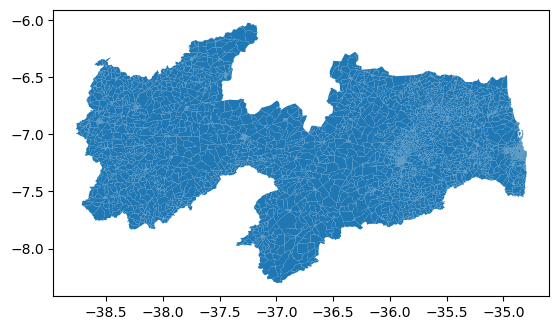

In [2]:
setores_pb = gpd.read_file("PB_Setores_2021.shp")
setores_pb.plot()

<Axes: >

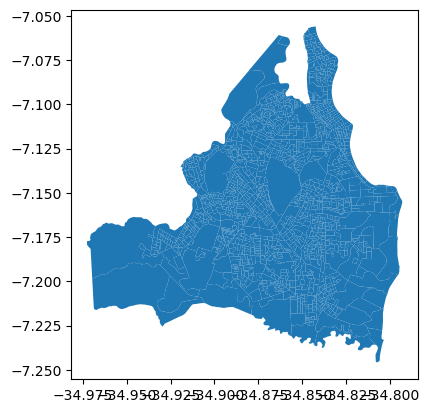

In [3]:
# mapa de polígonos de João Pessoa
setores_JP = setores_pb.loc[setores_pb["NM_MUN"] == "João Pessoa"]
setores_JP.plot()

In [4]:
# filtro de setores
setores_JP = setores_JP.loc[setores_JP["NM_MUN"] == "João Pessoa"]
setores_JP.head(5)

,CD_SETOR,CD_SIT,NM_SIT,CD_UF,NM_UF,SIGLA_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,geometry
3836,250750705000001,1,Área Urbana de Alta Densidade de Edificações,25,Paraíba,PB,2507507,João Pessoa,250750705,João Pessoa,25075070500,NaN,"POLYGON ((-34.87387 -7.14686, -34.87373 -7.147..."
3837,250750705000002,1,Área Urbana de Alta Densidade de Edificações,25,Paraíba,PB,2507507,João Pessoa,250750705,João Pessoa,25075070500,NaN,"POLYGON ((-34.87459 -7.14956, -34.87479 -7.150..."
3838,250750705000003,1,Área Urbana de Alta Densidade de Edificações,25,Paraíba,PB,2507507,João Pessoa,250750705,João Pessoa,25075070500,NaN,"POLYGON ((-34.87424 -7.14543, -34.87492 -7.145..."
3839,250750705000004,1,Área Urbana de Alta Densidade de Edificações,25,Paraíba,PB,2507507,João Pessoa,250750705,João Pessoa,25075070500,NaN,"POLYGON ((-34.87264 -7.14618, -34.87330 -7.146..."
3840,250750705000005,1,Área Urbana de Alta Densidade de Edificações,25,Paraíba,PB,2507507,João Pessoa,250750705,João Pessoa,25075070500,NaN,"POLYGON ((-34.87048 -7.14824, -34.87059 -7.148..."


In [ ]:
setores_JP.to_csv("Setores_Joao_Pessoa_PB.csv", index=False)

In [5]:
# bases do CNES
CNES = pd.read_csv('tbEstabelecimento202305.csv',low_memory=False, encoding="ISO-8859-1", sep=';')
CNES.head(5)

,CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,...,TP_ESTAB_SEMPRE_ABERTO,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,CO_TIPO_UNIDADE,NO_FANTASIA_ABREV,TP_GESTAO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')",CO_TIPO_ESTABELECIMENTO,CO_ATIVIDADE_PRINCIPAL,ST_CONTRATO_FORMALIZADO
0,2609602569302,2569302,1.040418e+13,3,3,PREFEITURA MUNICIPAL DE OLINDA,USF BULTRINS MONTE II,RUA PREFEITO MANOEL REGUEIRA,540,NaN,...,N,NaN,S,NaN,NaN,M,18/06/2003,NaN,NaN,NaN
1,2609602571943,2571943,1.040418e+13,3,3,PREFEITURA MUNICIPAL DE OLINDA,UNIDADE MOVEL,RUA DO SOL,311,NaN,...,N,NaN,N,NaN,NaN,M,18/06/2003,16.0,1.0,NaN
2,2609602344637,2344637,1.040418e+13,3,3,PREFEITURA MUNICIPAL DE OLINDA,USF ALTO DA MINA,RUA AVENCA,49,NaN,...,N,NaN,S,NaN,NaN,M,30/10/2001,1.0,12.0,NaN
3,2609602344696,2344696,1.040418e+13,3,3,PREFEITURA MUNICIPAL DE OLINDA,USF ILHA DE SANTANA I E II,RUA DA INTEGRACAO,S/N,NaN,...,N,NaN,S,NaN,NaN,M,30/10/2001,1.0,12.0,NaN
4,3112002142295,2142295,NaN,3,1,FUNDACAO COMUNITARIA DE SAUDE DE CANDEIAS,HOSPITAL CARLOS CHAGAS,AVENIDA PEDRO VIEIRA DE AZEVEDO,687,NaN,...,S,NaN,S,NaN,NaN,M,21/03/2002,6.0,9.0,S


In [6]:
# elimina os dados com valores nulos
CNES = CNES.dropna(subset=["NU_LATITUDE", "NU_LONGITUDE"])
CNES.head(5)

,CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,...,TP_ESTAB_SEMPRE_ABERTO,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,CO_TIPO_UNIDADE,NO_FANTASIA_ABREV,TP_GESTAO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')",CO_TIPO_ESTABELECIMENTO,CO_ATIVIDADE_PRINCIPAL,ST_CONTRATO_FORMALIZADO
1,2609602571943,2571943,1.040418e+13,3,3,PREFEITURA MUNICIPAL DE OLINDA,UNIDADE MOVEL,RUA DO SOL,311,NaN,...,N,NaN,N,NaN,NaN,M,18/06/2003,16.0,1.0,NaN
2,2609602344637,2344637,1.040418e+13,3,3,PREFEITURA MUNICIPAL DE OLINDA,USF ALTO DA MINA,RUA AVENCA,49,NaN,...,N,NaN,S,NaN,NaN,M,30/10/2001,1.0,12.0,NaN
3,2609602344696,2344696,1.040418e+13,3,3,PREFEITURA MUNICIPAL DE OLINDA,USF ILHA DE SANTANA I E II,RUA DA INTEGRACAO,S/N,NaN,...,N,NaN,S,NaN,NaN,M,30/10/2001,1.0,12.0,NaN
4,3112002142295,2142295,NaN,3,1,FUNDACAO COMUNITARIA DE SAUDE DE CANDEIAS,HOSPITAL CARLOS CHAGAS,AVENIDA PEDRO VIEIRA DE AZEVEDO,687,NaN,...,S,NaN,S,NaN,NaN,M,21/03/2002,6.0,9.0,S
6,3112902759861,2759861,NaN,3,1,LABORATORIO SANTA HELENA LTDA,LABORATORIO SANTA HELENA,AV MANOEL FRANCISCO DE FREITAS,57,NaN,...,N,NaN,S,NaN,NaN,M,12/09/2003,18.0,2.0,NaN


In [7]:
# filtro CNES PB
cnes_paraiba = CNES.loc[CNES["CO_ESTADO_GESTOR"]==25]
cnes_paraiba

,CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,...,TP_ESTAB_SEMPRE_ABERTO,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,CO_TIPO_UNIDADE,NO_FANTASIA_ABREV,TP_GESTAO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')",CO_TIPO_ESTABELECIMENTO,CO_ATIVIDADE_PRINCIPAL,ST_CONTRATO_FORMALIZADO
171,2507002604868,2604868,8.940694e+12,3,3,SECRETARIA MUNICIPAL DE SAUDE,CENTRO MEDICO DR MANOEL MEDEIROS MAIA ITAPORANGA,RUA MAJOR SERAFIM,S/N,NaN,...,N,NaN,S,NaN,NaN,M,30/09/2002,16.0,1.0,NaN
172,2507002604906,2604906,8.940694e+12,3,3,MUNICIPIO DE ITAPORANGA,CENTRO DE SAUDE DO MUNICIPIO,RUA OSVALDO CRUZ,124,NaN,...,N,NaN,N,NaN,NaN,M,30/09/2002,16.0,1.0,NaN
173,2507002794047,2794047,8.778268e+12,3,3,SECRETARIA DE ESTADO DA SAUDE,HEMONUCLEO DE ITAPORANGA,RUA OSVALDO CRUZ,S/N,NaN,...,S,NaN,S,NaN,NaN,E,18/09/2003,10.0,15.0,NaN
174,2507102356759,2356759,9.165176e+12,3,3,PREFEITURA MUNICIPAL DE ITAPOROROCA,UNIDADE DE SAUDE DA FAMILIA ROSEIRA,R SAO JOAO,S/N,NaN,...,N,NaN,S,NaN,NaN,M,04/07/2003,1.0,12.0,NaN
175,2507102592711,2592711,9.165176e+12,3,3,MUNICIPIO DE ITAPOROROCA,UNIDADE DE SAUDE DA FAMILIA SAO JOAO,PADRE JOAO MADRUGA,140,NaN,...,N,NaN,N,NaN,NaN,M,05/06/2002,1.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489867,2507504106571,4106571,NaN,3,1,CLINICA PEDIATRICA ABC LTDA,CLINICA ABC,FRANCISCO DE ASSIS FRADE,150,SALA 109 CXPST 034,...,N,NaN,S,NaN,NaN,M,24/03/2023,16.0,1.0,N
489916,2507504194438,4194438,NaN,3,1,ISABELLA CORREA ATANASIO LOPES NUTRICAO LTDA,ISABELLA CORREA ATANASIO LOPES NUTRICAO,DESEMBARGADOR JOSE PEREGRINO,217,SALA 206 CXPST 39,...,N,NaN,S,NaN,NaN,M,02/06/2023,16.0,1.0,N
489924,2507504174674,4174674,NaN,3,1,FNLB SERVICOS MEDICOS LTDA,FNLB SERVICOS MEDICOS,FRANCISCA MOURA,434,SALA 609 CXPST 26,...,N,NaN,S,NaN,NaN,M,09/05/2023,16.0,1.0,N
489934,2504004124731,4124731,NaN,3,1,CLINICA ESSENCIALMENTE SERVICOS MEDICOS LTDA,ESSENCIALMENTE,BENJAMIN CONSTANTE,170,SL 1301 1302 1303,...,N,NaN,S,NaN,NaN,M,25/03/2023,16.0,1.0,N


In [8]:
cnes_paraiba.columns

Index(['CO_UNIDADE', 'CO_CNES', 'NU_CNPJ_MANTENEDORA', 'TP_PFPJ', 'NIVEL_DEP',
       'NO_RAZAO_SOCIAL', 'NO_FANTASIA', 'NO_LOGRADOURO', 'NU_ENDERECO',
       'NO_COMPLEMENTO', 'NO_BAIRRO', 'CO_CEP', 'CO_REGIAO_SAUDE',
       'CO_MICRO_REGIAO', 'CO_DISTRITO_SANITARIO',
       'CO_DISTRITO_ADMINISTRATIVO', 'NU_TELEFONE', 'NU_FAX', 'NO_EMAIL',
       'NU_CPF', 'NU_CNPJ', 'CO_ATIVIDADE', 'CO_CLIENTELA', 'NU_ALVARA',
       'DT_EXPEDICAO', 'TP_ORGAO_EXPEDIDOR', 'DT_VAL_LIC_SANI', 'TP_LIC_SANI',
       'TP_UNIDADE', 'CO_TURNO_ATENDIMENTO', 'CO_ESTADO_GESTOR',
       'CO_MUNICIPIO_GESTOR', 'TO_CHAR(DT_ATUALIZACAO,'DD/MM/YYYY')',
       'CO_USUARIO', 'CO_CPFDIRETORCLN', 'REG_DIRETORCLN',
       'ST_ADESAO_FILANTROP', 'CO_MOTIVO_DESAB', 'NO_URL', 'NU_LATITUDE',
       'NU_LONGITUDE', 'TO_CHAR(DT_ATU_GEO,'DD/MM/YYYY')', 'NO_USUARIO_GEO',
       'CO_NATUREZA_JUR', 'TP_ESTAB_SEMPRE_ABERTO',
       'ST_GERACREDITO_GERENTE_SGIF', 'ST_CONEXAO_INTERNET', 'CO_TIPO_UNIDADE',
       'NO_FANTASIA_ABREV',

In [9]:
# Converter as colunas 'NU_LATITUDE' e 'NU_LONGITUDE' para tipo numérico
cnes_paraiba.loc[:,'NU_LATITUDE'] = pd.to_numeric(CNES['NU_LATITUDE'], errors='coerce')
cnes_paraiba.loc[:,'NU_LONGITUDE'] = pd.to_numeric(CNES['NU_LONGITUDE'], errors='coerce')

# Armazenar os dados em uma variável
latitudes = cnes_paraiba['NU_LATITUDE']
longitudes = cnes_paraiba['NU_LONGITUDE']

C:\Users\mauri\AppData\Local\Temp\ipykernel_13976\2842109551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnes_paraiba.loc[:,'NU_LATITUDE'] = pd.to_numeric(CNES['NU_LATITUDE'], errors='coerce')
C:\Users\mauri\AppData\Local\Temp\ipykernel_13976\2842109551.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cnes_paraiba.loc[:,'NU_LATITUDE'] = pd.to_numeric(CNES['NU_LATITUDE'], errors='coerce')
C:\Users\mauri\AppData\Local\Temp\ipykernel_13976\2842109551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [10]:
gdf = gpd.GeoDataFrame(cnes_paraiba, geometry=gpd.points_from_xy(cnes_paraiba['NU_LONGITUDE'], cnes_paraiba['NU_LATITUDE']))
print(setores_pb.crs)

EPSG:4674


In [11]:
# (CRS) para garantir que as coordenadas geoespaciais sejam interpretadas corretamente e que as análises e 
#visualizações geoespaciais sejam realizadas com precisão em mapas e outros contextos espaciais.
gdf = gdf.set_crs('EPSG:4674', allow_override=True)

In [12]:
gdf = gdf.to_crs(setores_pb.crs)

In [13]:
# Criar uma coluna de geometria nos pontos do CNES
geometry = [Point(x, y) for x, y in zip(gdf['NU_LONGITUDE'], gdf['NU_LATITUDE'])]
geo_cnes = gpd.GeoDataFrame(gdf, geometry=geometry)

# Realizar o cruzamento espacial entre os setores censitários e os pontos do CNES
cruzamento = gpd.sjoin(setores_pb, geo_cnes, how='inner', op='intersects')

# Exibir o resultado do cruzamento
print(cruzamento)

C:\Users\mauri\anacondaAtualizado\lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


             CD_SETOR CD_SIT                                        NM_SIT  \
0     250010605000001      1  Área Urbana de Alta Densidade de Edificações   
1     250010605000002      1  Área Urbana de Alta Densidade de Edificações   
1     250010605000002      1  Área Urbana de Alta Densidade de Edificações   
1     250010605000002      1  Área Urbana de Alta Densidade de Edificações   
1     250010605000002      1  Área Urbana de Alta Densidade de Edificações   
...               ...    ...                                           ...   
9255  251720905000008      8            Área Rural (exclusive aglomerados)   
9259  251720905000012      5                                       Povoado   
9262  251740705000001      1  Área Urbana de Alta Densidade de Edificações   
9262  251740705000001      1  Área Urbana de Alta Densidade de Edificações   
9263  251740705000002      8            Área Rural (exclusive aglomerados)   

     CD_UF    NM_UF SIGLA_UF   CD_MUN       NM_MUN    CD_DIST  

In [ ]:
cruzamento.to_csv("Cruzamento_de_poligonos_Atualizado.csv", index=False)

In [14]:
cruzamento.columns

Index(['CD_SETOR', 'CD_SIT', 'NM_SIT', 'CD_UF', 'NM_UF', 'SIGLA_UF', 'CD_MUN',
       'NM_MUN', 'CD_DIST', 'NM_DIST', 'CD_SUBDIST', 'NM_SUBDIST', 'geometry',
       'index_right', 'CO_UNIDADE', 'CO_CNES', 'NU_CNPJ_MANTENEDORA',
       'TP_PFPJ', 'NIVEL_DEP', 'NO_RAZAO_SOCIAL', 'NO_FANTASIA',
       'NO_LOGRADOURO', 'NU_ENDERECO', 'NO_COMPLEMENTO', 'NO_BAIRRO', 'CO_CEP',
       'CO_REGIAO_SAUDE', 'CO_MICRO_REGIAO', 'CO_DISTRITO_SANITARIO',
       'CO_DISTRITO_ADMINISTRATIVO', 'NU_TELEFONE', 'NU_FAX', 'NO_EMAIL',
       'NU_CPF', 'NU_CNPJ', 'CO_ATIVIDADE', 'CO_CLIENTELA', 'NU_ALVARA',
       'DT_EXPEDICAO', 'TP_ORGAO_EXPEDIDOR', 'DT_VAL_LIC_SANI', 'TP_LIC_SANI',
       'TP_UNIDADE', 'CO_TURNO_ATENDIMENTO', 'CO_ESTADO_GESTOR',
       'CO_MUNICIPIO_GESTOR', 'TO_CHAR(DT_ATUALIZACAO,'DD/MM/YYYY')',
       'CO_USUARIO', 'CO_CPFDIRETORCLN', 'REG_DIRETORCLN',
       'ST_ADESAO_FILANTROP', 'CO_MOTIVO_DESAB', 'NO_URL', 'NU_LATITUDE',
       'NU_LONGITUDE', 'TO_CHAR(DT_ATU_GEO,'DD/MM/YYYY')', 'NO_

<Axes: >

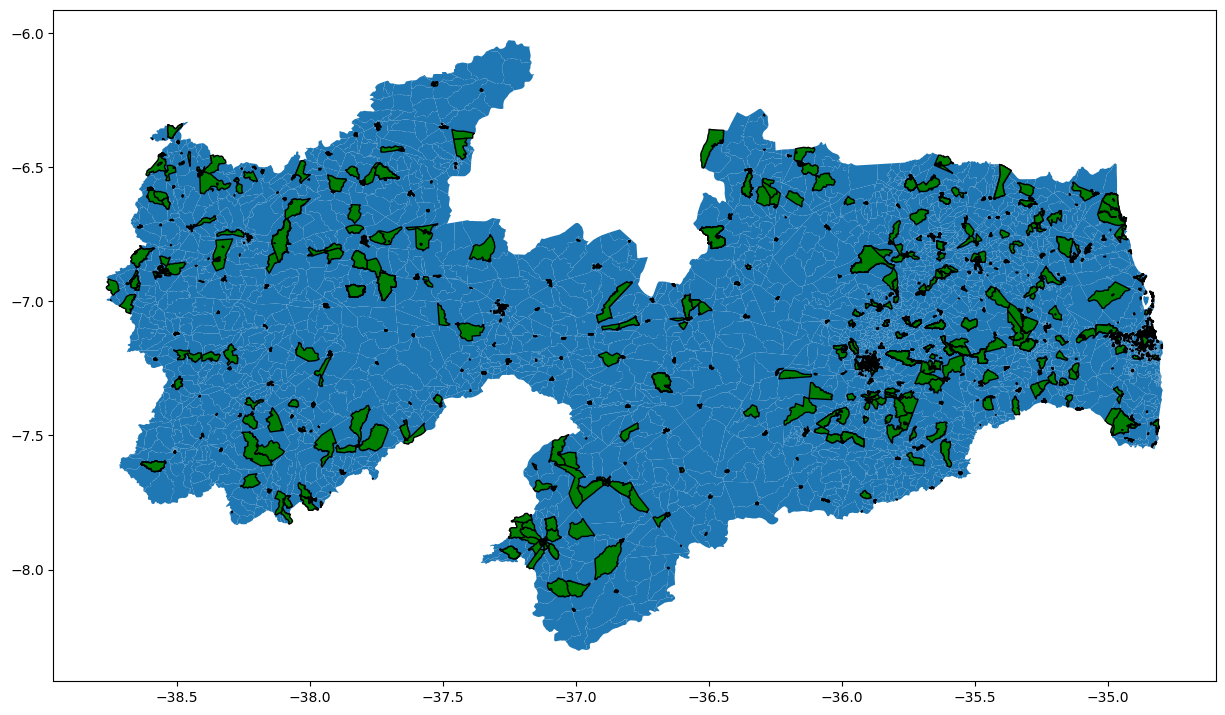

In [15]:
fig, ax = plt.subplots(figsize=(15,15))

setores_pb.plot(ax=ax)
cruzamento.plot(ax=ax, facecolor="green", edgecolor="black")

In [16]:
# filtro de JP pelo cep. 
cnes_JP = CNES.loc[CNES["CO_CEP"]== 58040040]
cnes_JP

,CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,...,TP_ESTAB_SEMPRE_ABERTO,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,CO_TIPO_UNIDADE,NO_FANTASIA_ABREV,TP_GESTAO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')",CO_TIPO_ESTABELECIMENTO,CO_ATIVIDADE_PRINCIPAL,ST_CONTRATO_FORMALIZADO
34606,2507500909076,909076,8.806754e+12,3,3,SECRETARIA DE SAUDE,CENTRO DE INFORMACOES ESTRATEGICAS EM VIGILANC...,AVENIDA JULIA FREIRE,S/N,NaN,...,S,NaN,S,NaN,NaN,M,11/10/2021,22.0,19.0,NaN
36451,2507507999178,7999178,NaN,3,1,PLENITUDE SERVICOS DE SAUDE EIRELI,CLINICA PLENITUDE,JULIA FREIRE,1536,NaN,...,N,NaN,S,NaN,NaN,M,20/07/2016,16.0,1.0,N
46240,2507502399296,2399296,8.806754e+12,3,3,PREFEITURA MUNICIPAL DE JOAO PESSOA,DIVISAO DE VIGILANCIA SANITARIA,AV JULIA FREIRE,783,NaN,...,S,NaN,S,NaN,NaN,M,19/11/2001,22.0,19.0,NaN
84100,2507507682298,7682298,8.806754e+12,3,3,MUNICIPIO DE JOAO PESSOA,TELESSAUDE REDES JOAO PESSOA,AVENIDA JULIA FREIRE,1,NaN,...,N,NaN,S,NaN,NaN,M,09/03/2015,11.0,14.0,NaN
87021,2507503726401,3726401,8.806754e+12,3,3,PREFEITURA DE MUNICIPAL DE JOAO PESSOA,VIGILANCIA EPIDEMIOLOGICA MUNICIPAL,AV JULIA FREIRE,S/N,NaN,...,S,NaN,S,NaN,NaN,M,08/01/2006,18.0,2.0,NaN
100054,2507506868436,6868436,NaN,3,1,DERMAVASC CENTRO INTEG DE DERMAT CIRURG VASC E...,DERMAVASC,AVENIDA JULIA FREIRE,1200,SALA 204,...,N,NaN,S,NaN,NaN,M,06/10/2011,16.0,1.0,N
110977,2507505631718,5631718,NaN,1,1,ANNE VALERIA MACEDO FAUSTINO,CONSULTORIO MEDICO ANNE VALERIA MACEDO FAUSTINO,AV JULIA FREIRE,1200,ED METROPOLITAN,...,N,NaN,S,NaN,NaN,M,20/12/2007,16.0,1.0,N
149663,2507506525938,6525938,8.806754e+12,3,3,PREFEITURA MUNICIPAL DE JOAO PESSOA,SECRETARIA MUNICIPAL DE SAUDE DE JOAO PESSOA,AV JULIA FREIRE,S/N,NaN,...,N,NaN,S,NaN,NaN,M,01/06/2010,2.0,22.0,NaN
155387,2507502399989,2399989,NaN,3,1,ULTRA SOM SERVICOS MEDICOS LTDA,HOSPITAL GERAL DA PARAIBA E HAPCLINICA JOAO PE...,JULIA FREIRE,1058,NaN,...,N,NaN,S,NaN,NaN,M,19/11/2001,16.0,1.0,N
172418,2507503237370,3237370,NaN,3,1,MASTOCLIM CENTRO DE DIAGNOSTICO POR IMAGEM DA ...,MASTOCLIN,JULIA FREIRE,960,TERREO1 ANDAR,...,N,NaN,S,NaN,NaN,M,19/08/2004,16.0,1.0,N


In [17]:
# Converter as colunas 'NU_LATITUDE' e 'NU_LONGITUDE' para tipo numérico
cnes_JP.loc[:,'NU_LATITUDE'] = pd.to_numeric(CNES['NU_LATITUDE'], errors='coerce')
cnes_JP.loc[:,'NU_LONGITUDE'] = pd.to_numeric(CNES['NU_LONGITUDE'], errors='coerce')

# Armazenar os dados em uma variável
latitudes = cnes_JP['NU_LATITUDE']
longitudes = cnes_JP['NU_LONGITUDE']

C:\Users\mauri\AppData\Local\Temp\ipykernel_13976\3277553610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnes_JP.loc[:,'NU_LATITUDE'] = pd.to_numeric(CNES['NU_LATITUDE'], errors='coerce')
C:\Users\mauri\AppData\Local\Temp\ipykernel_13976\3277553610.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cnes_JP.loc[:,'NU_LATITUDE'] = pd.to_numeric(CNES['NU_LATITUDE'], errors='coerce')
C:\Users\mauri\AppData\Local\Temp\ipykernel_13976\3277553610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [18]:
gdf_JP = gpd.GeoDataFrame(cnes_JP, geometry=gpd.points_from_xy(cnes_JP['NU_LONGITUDE'], cnes_JP['NU_LATITUDE']))

In [19]:
# Criar uma coluna de geometria nos pontos do CNES
geometry = [Point(x, y) for x, y in zip(gdf_JP['NU_LONGITUDE'], gdf_JP['NU_LATITUDE'])]
geo_cnes = gpd.GeoDataFrame(gdf_JP, geometry=geometry)

# Realizar o cruzamento espacial entre os setores censitários e os pontos do CNES
cruzamento_cnes_jp = gpd.sjoin(setores_pb, geo_cnes, how='inner', op='intersects')

# Exibir o resultado do cruzamento
print(cruzamento_cnes_jp)

             CD_SETOR CD_SIT                                        NM_SIT  \
3869  250750705000036      1  Área Urbana de Alta Densidade de Edificações   
3870  250750705000037      1  Área Urbana de Alta Densidade de Edificações   
3984  250750705000158      1  Área Urbana de Alta Densidade de Edificações   
3984  250750705000158      1  Área Urbana de Alta Densidade de Edificações   
3984  250750705000158      1  Área Urbana de Alta Densidade de Edificações   
3984  250750705000158      1  Área Urbana de Alta Densidade de Edificações   
3984  250750705000158      1  Área Urbana de Alta Densidade de Edificações   
4764  250750705000998      1  Área Urbana de Alta Densidade de Edificações   
4789  250750705001026      1  Área Urbana de Alta Densidade de Edificações   
4789  250750705001026      1  Área Urbana de Alta Densidade de Edificações   
4789  250750705001026      1  Área Urbana de Alta Densidade de Edificações   
4789  250750705001026      1  Área Urbana de Alta Densidade de E

C:\Users\mauri\anacondaAtualizado\lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\mauri\AppData\Local\Temp\ipykernel_13976\2761635569.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4674
Right CRS: None

  cruzamento_cnes_jp = gpd.sjoin(setores_pb, geo_cnes, how='inner', op='intersects')


<Axes: >

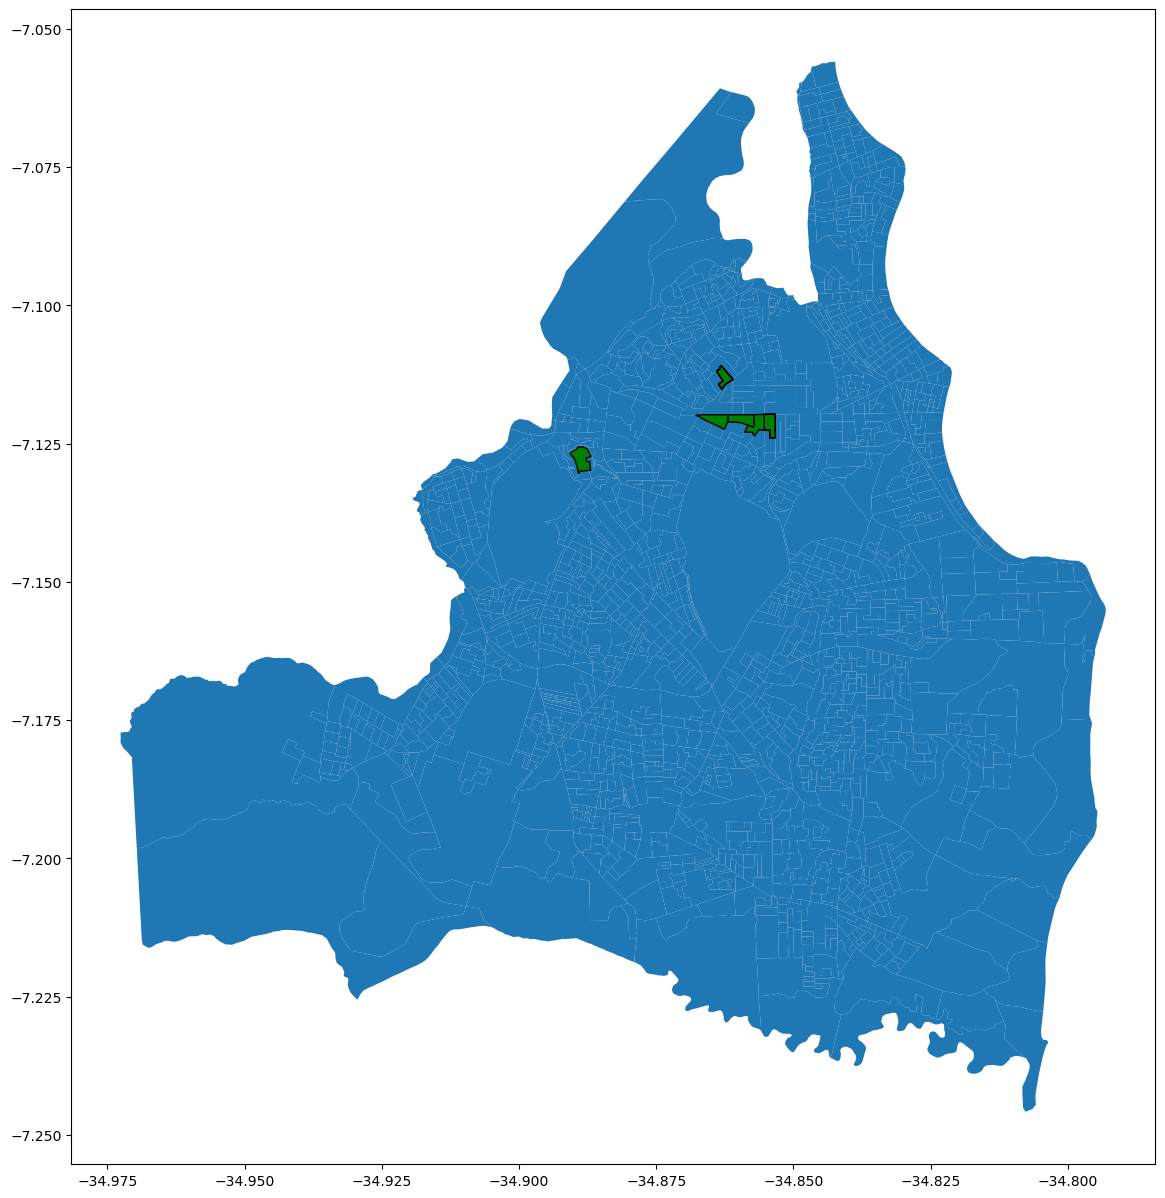

In [20]:
fig, ax = plt.subplots(figsize=(15,15))

setores_JP.plot(ax=ax)
cruzamento_cnes_jp.plot(ax=ax, facecolor="green", edgecolor="black")

In [ ]:
cruzamento_cnes_jp.to_csv("Cruzamento_de_poligonos_Atualizado_cnesjp.csv", index=False)